In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
gene_name = 'MALAT1'
path = f'/tmp/Mazutislab-out/Ignas/RT_comparison/coverage_plots/{gene_name}/'
coverage_file_path = path + 'comparison.geneBodyCoverage.txt'
exons_per_bin_path = path + 'exons_per_bin.txt'
poly_x_streak_path = path + 'streaks_per_bin.txt'
gene_bed_path = path + 'gene.bed'

In [9]:
_, max_streaks_per_bin = open(poly_x_streak_path)
max_streaks_per_bin = max_streaks_per_bin.replace('[', "").replace(']', "")
max_streaks_per_bin = np.fromstring(max_streaks_per_bin, sep = ',', dtype=int)
max_streaks_per_bin = max_streaks_per_bin
n_bins = len(max_streaks_per_bin)

for i, line in enumerate(open(gene_bed_path)):
        line = line.split('\t')
        gene_start = int(line[1])
        gene_end = int(line[2])
        strand = line[5]
        gene_length = gene_end - gene_start
        bases_per_bin = gene_length/n_bins
#print(gene_length)

In [10]:
reads_per_bin = {}
norm_reads_per_bin = {}
i = 0

for line in open(coverage_file_path):
    if not line.startswith('Percentile'):
        line = line.split('\t')
        key = line[0]
        values = np.fromstring('\t'.join(line[1:]), sep = '\t', dtype=int)
        print(values.sum())
        reads_per_bin[key] = values
        norm_reads_per_bin[key] = values/sum(values)
#print(reads_per_bin)
        

74692
65903
41906
129195


In [58]:
exon_coverages={}
for i, line in enumerate(open(exons_per_bin_path)):
    if i%2==0:
        key = line.strip()
    else:
        line=line.strip()
        line = line.replace('[', "").replace(']', "")
        exon_coverages[key] = get_exon_intervals(np.fromstring(line, sep = ',', dtype=int))
        #print(exon_coverages[key])
        '''
        exon_coverages[key] = np.fromstring(line, sep = ',', dtype=int)
        if i==1:
            total_coverage = np.zeros(len(exon_coverages[key]), dtype=int)
        total_coverage += exon_coverages[key]
        '''
#print(total_coverage)
#print(exon_coverages)

In [36]:
def get_exon_intervals(exons_per_bin):
    exon_length = 0
    exon_start = -1
    exon_intervals = []
    for i in np.arange(len(exons_per_bin)):
        if exons_per_bin[i]==1:
            if exon_length==0:
                exon_start = i
            exon_length+=1
        elif exon_start != -1 and exon_length>0:
            exon_intervals.append((exon_start, exon_length))
            exon_length = 0
    #exception for the last bin:
    if exon_start != -1 and exon_length>0:
            exon_intervals.append((exon_start, exon_length))
        
    return exon_intervals

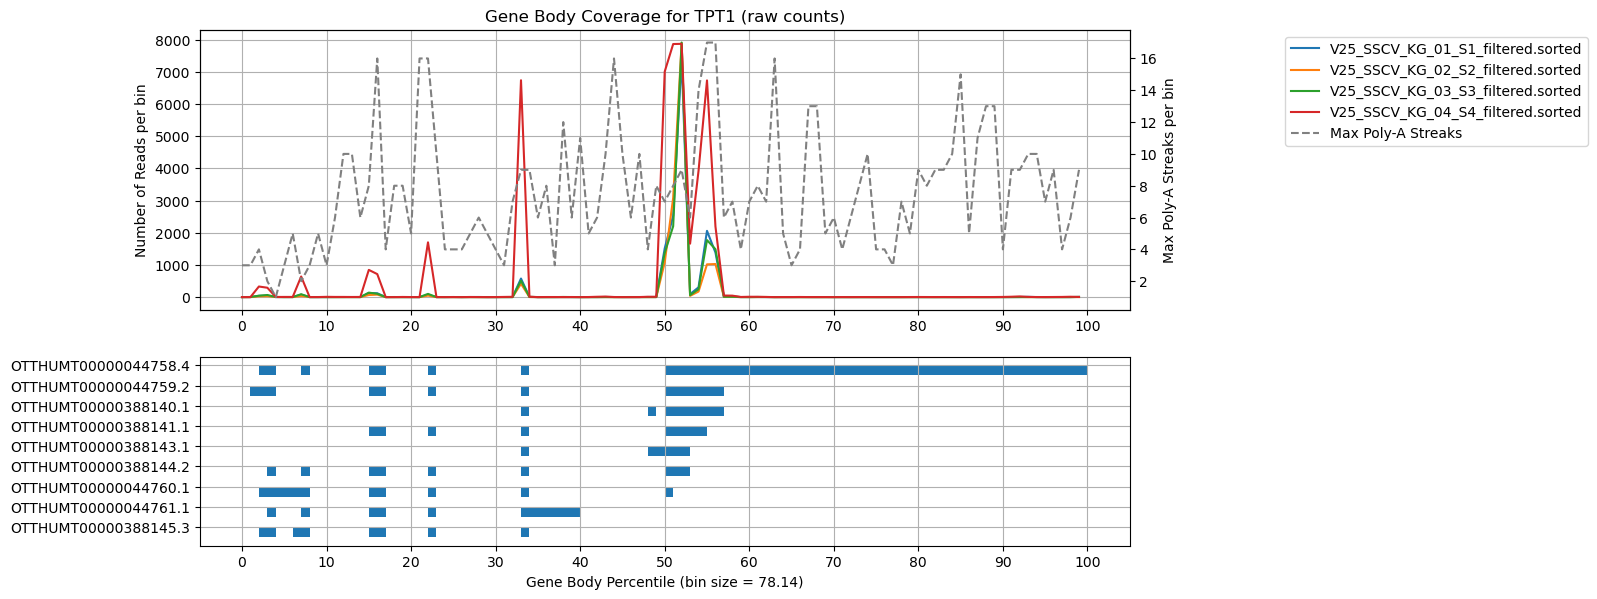

In [80]:
main_height = 4
exon_bar_height = 0.3
total_height = main_height + (exon_bar_height * len(exon_coverages)) 
fig, axs = plt.subplots(2,1,figsize=(12,main_height + (exon_bar_height * len(exon_coverages))), gridspec_kw={'height_ratios': [main_height, (exon_bar_height * len(exon_coverages))]})
ax1=axs[0]
for key, values in reads_per_bin.items():
    ax1.plot(values, label=key)
ax1.xaxis.set_ticks(np.arange(0, 101, 10))
ax1.set_xlim(-5,105)
ax1.grid(True)
ax1.set_ylabel('Number of Reads per bin')
ax2 = ax1.twinx()
ax2.plot(max_streaks_per_bin, color='gray', linestyle='--', label='Max Poly-A Streaks')
ax2.set_ylabel('Max Poly-A Streaks per bin')
#ax2.plot(total_coverage, color='black', linestyle=':', label=f'exonic coverage (from {len(exon_coverages)} transcript variants)')
#i=1
ax3=axs[1]
for i, key in enumerate(exon_coverages):
    ax3.broken_barh(exon_coverages[key], yrange=(i,0.5))
ax3.set_yticks(range(len(exon_coverages)), labels=exon_coverages.keys())
ax3.invert_yaxis()
ax3.xaxis.set_ticks(np.arange(0, 101, 10))
ax3.grid(True)
ax3.set_xlim(-5,105)
ax3.set_xlabel(f'Gene Body Percentile (bin size = {bases_per_bin})') 
#ax2.set_ylim(0, max(max_streaks_per_bin))

plt.title(f'Gene Body Coverage for {gene_name} (raw counts)')
fig.legend(loc="upper right", bbox_to_anchor=(1.5,1), bbox_transform=ax1.transAxes)
plt.savefig(path + 'raw_coverage.png', bbox_inches = 'tight')
plt.show()


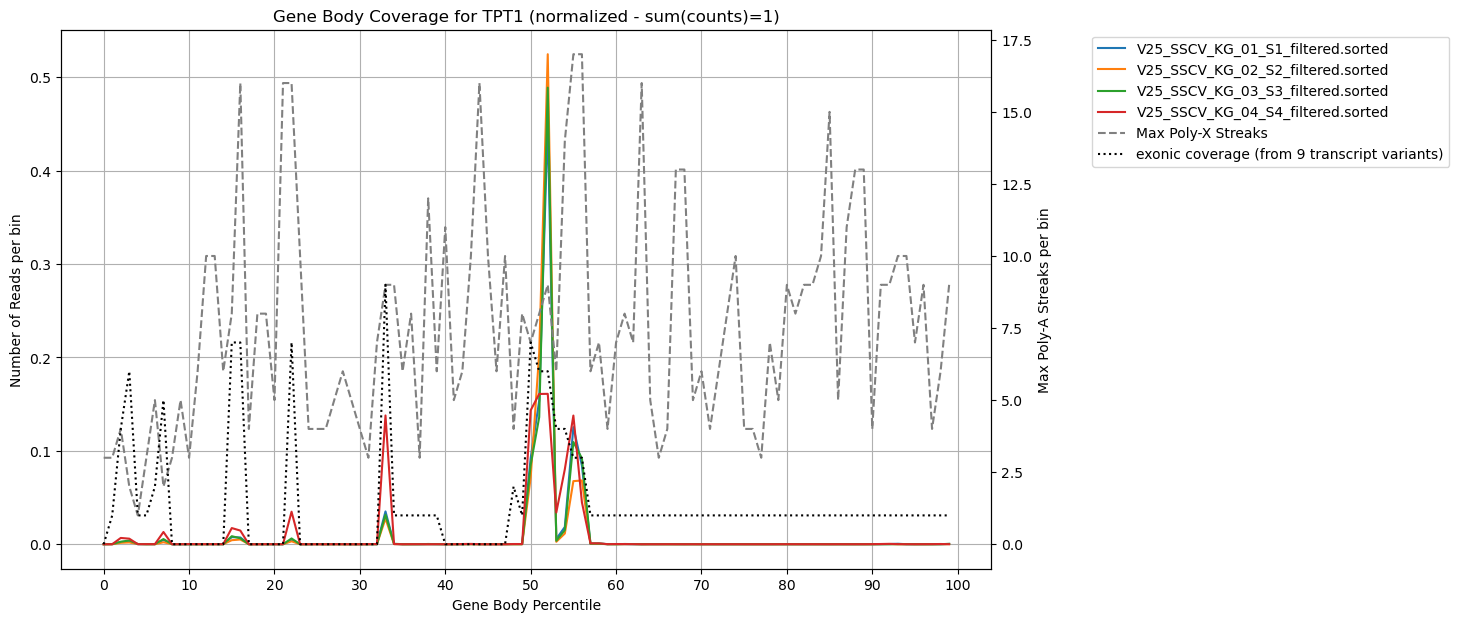

In [33]:
fig, ax1 = plt.subplots(figsize=(12,7))
for key, values in norm_reads_per_bin.items():
    ax1.plot(values, label=key)
ax1.xaxis.set_ticks(np.arange(0, 101, 10))
ax1.grid(True)
ax1.set_xlabel('Gene Body Percentile') 
ax1.set_ylabel('Number of Reads per bin')
ax2 = ax1.twinx()
ax2.plot(max_streaks_per_bin, color='gray', linestyle='--', label='Max Poly-X Streaks')
ax2.set_ylabel('Max Poly-A Streaks per bin')
ax2.plot(total_coverage, color='black', linestyle=':', label=f'exonic coverage (from {len(exon_coverages)} transcript variants)')
i=1
'''
for key in exon_coverages:
    ax2.plot(i*exon_coverages[key], color='black', linestyle=':', label = key + ' exons')
    i+=0.2
'''
#ax2.set_ylim(0, max(max_streaks_per_bin))

plt.title(f'Gene Body Coverage for {gene_name}')
fig.legend(loc="upper right", bbox_to_anchor=(1.5,1), bbox_transform=ax1.transAxes)
plt.savefig(path + 'norm_coverage.png', bbox_inches = 'tight')
plt.show()